# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d50/0715cddaee870ef6ba9a73a7bed826d467cd4bfb9dd57ac4e6eec6f7.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Warsaw, Mazovia, Poland**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(50,'0715cddaee870ef6ba9a73a7bed826d467cd4bfb9dd57ac4e6eec6f7')

In [2]:
binsize = 50
hashid = '0715cddaee870ef6ba9a73a7bed826d467cd4bfb9dd57ac4e6eec6f7'
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
station_locations_by_hash = df[df['hash'] == hashid]
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# Data transformations

In [3]:
import pandas as pd

# reading the adequate file
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d50/0715cddaee870ef6ba9a73a7bed826d467cd4bfb9dd57ac4e6eec6f7.csv')

# Station ID is redundant by now
data.drop('ID', axis=1, inplace=True)

# acquiring t_max, representing maximum values for daily temperatures...
t_max = data[data['Element'] == 'TMAX'].drop('Element', axis=1)
t_max['Date'] = pd.to_datetime(t_max['Date'])
t_max['Year'], t_max['Month'], t_max['Day'] = t_max['Date'].dt.year, t_max['Date'].dt.month, t_max['Date'].dt.day
t_max = t_max[~(((t_max['Month']) == 2) & (t_max['Day'] == 29))] # that gets rid of Feb 29, sorry :)
t_max.drop('Date', axis=1, inplace=True)

# splitting t_max into two dataframes - the 2005-2014 timespan and 2015
t_max_2015 = t_max[t_max['Year'] == 2015]
t_max_2015 = t_max_2015.groupby(['Month', 'Day']).max()
t_max_2015.drop('Year', axis=1, inplace=True)
t_max_2015['Data_Value'] /= 10 # adjusting the temperature - I would've done this earlier, but Jupyter hangs out of memory

t_max = t_max[t_max['Year'] != 2015]
t_max = t_max.groupby(['Month', 'Day']).max()
t_max.drop('Year', axis=1, inplace=True)
t_max['Data_Value'] /= 10

# ... and t_min, respectively
t_min = data[data['Element'] == 'TMIN'].drop('Element', axis=1)
t_min['Date'] = pd.to_datetime(t_min['Date'])
t_min['Year'], t_min['Month'], t_min['Day'] = t_min['Date'].dt.year, t_min['Date'].dt.month, t_min['Date'].dt.day
t_min = t_min[~(((t_min['Month']) == 2) & (t_min['Day'] == 29))]
t_min.drop('Date', axis=1, inplace=True)

# splitting t_min into two dataframes - the 2005-2014 timespan and 2015
t_min_2015 = t_min[t_min['Year'] == 2015]
t_min_2015 = t_min_2015.groupby(['Month', 'Day']).min()
t_min_2015.drop('Year', axis=1, inplace=True)
t_min_2015['Data_Value'] /= 10

t_min = t_min[t_min['Year'] != 2015]
t_min = t_min.groupby(['Month', 'Day']).min()
t_min.drop('Year', axis=1, inplace=True)
t_min['Data_Value'] /= 10


# Plotting

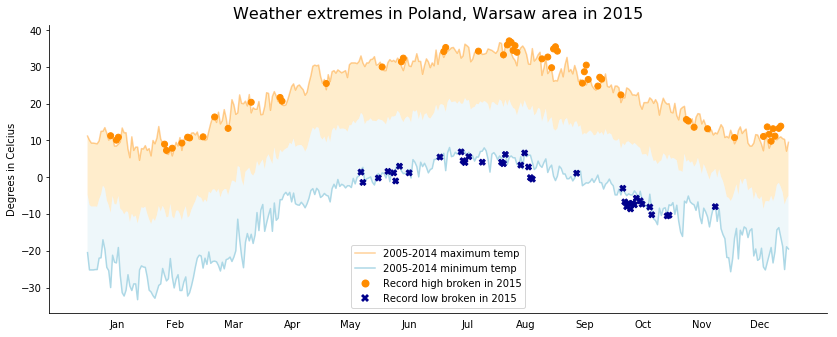

In [12]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline
import numpy as np

days = range(len(t_max))
fig = plt.figure()
ax = fig.add_axes((0, 0, 1.8, 1))
t_max_line, = plt.plot(days,t_max['Data_Value'], label='2005-2014 maximum temp', c='darkorange', alpha=0.4)
t_min_line, = plt.plot(days,t_min['Data_Value'], label='2005-2014 minimum temp', c='lightblue')

# just an aesthetical fill_between - to show some artistic flavor
plt.gca().fill_between(days, t_max['Data_Value'], (t_max['Data_Value'] + t_min['Data_Value']) / 2,
                       facecolor=('orange'), alpha=0.2)
plt.gca().fill_between(days, t_min['Data_Value'], (t_max['Data_Value'] + t_min['Data_Value']) / 2,
                       facecolor=('lightblue'), alpha=0.2)
# the borderline should have been the median probably, but (max+min)/2 will do for now

# preparing the color labels for the t_max_2015 and t_min_2015
col_max = t_max_2015['Data_Value'] >= t_max['Data_Value']
col_max = pd.Series(map(int, col_max))
col_max = col_max.apply(lambda x: ['None', 'darkorange'][x])

col_min = t_min_2015['Data_Value'] <= t_min['Data_Value']
col_min = pd.Series(map(int, col_min))
col_min = col_min.apply(lambda x: ['None', 'darkblue'][x])

# plotting the scatterplot - with color or 'None' as marker colors
plt.scatter(days, t_max_2015, c=col_max)
plt.scatter(days, t_min_2015, c=col_min, marker='X', zorder=20)

# styling the title and the border
plt.title('Weather extremes in Poland, Warsaw area in 2015', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fitting the axes and ticks
plt.xticks(np.arange(0, 365, 15.18), ['', 'Jan', '', 'Feb', '', 'Mar', '', 'Apr', '', 'May', '', 'Jun',
                                    '', 'Jul', '', 'Aug', '', 'Sep', '', 'Oct', '', 'Nov', '', 'Dec'], rotation=0, ha='center')
ax.tick_params(axis='x',which='major',bottom='off')
plt.ylabel('Degrees in Celcius')

# making it a legend ;)
rh_2015 = mlines.Line2D([], [], color='None', marker='o', markerfacecolor='darkorange',
                        markersize=8, label='Record high broken in 2015')
rl_2015 = mlines.Line2D([], [], color='None', marker='X', markerfacecolor='darkblue',
                        markersize=8, label='Record low broken in 2015')
ax.legend(handles=[t_max_line, t_min_line, rh_2015, rl_2015], loc=8)

# ta-dam!
plt.savefig('weather_extremes.png', dpi=100, bbox_inches='tight', orientation='landscape')
plt.show()

Just a general remark - don't be surprised to see record highs and lows beaten in 2015 in consecutive days!
The selection of weather stations I got in the assignment for "Warsaw, Poland" included milder climate locations in Western Poland, as well as harsh climate locations in Northwestern Russia.